<span style='color:Red'> **Assignment 1** </span>

**RMIT University Vietnam**

**Course:** COSC2753 - Machine Learning

**Student Name:** Nguyen Quoc Minh

**Student ID:** s3758994

**Lecturer:** Mr. Bao Nguyen

**Due Date:** 9 April 2022

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Import dataset

In [3]:
# Import Paitients_Files_Train.csv into a DataFrame and drop 2 columns ID and Insurance
paitientsDf = pd.read_csv("Paitients_Files_Train.csv"
                        , delimiter= ",").drop(['ID', 'Insurance'], axis='columns')


## 3. Transform data for Sepssis column into Binary

In [4]:
# Data of Sepssis is converted into Binary Data
df_one = pd.get_dummies(paitientsDf["Sepssis"])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((paitientsDf,df_one), axis=1)
 
# Sepssis column is dropped
df_two = df_two.drop(["Sepssis"], axis=1)
 
# Let Negative =0 and Positive =1 so I drop Negative column here
df_two = df_two.drop(["Negative"], axis=1)
 
# Rename the Column
newPaitientsDf = df_two.rename(columns={"Positive": "Sepssis"})
 
# Print the new DataFrame
print(newPaitientsDf)

     PRG   PL  PR  SK   TS   M11    BD2  Age  Sepssis
0      6  148  72  35    0  33.6  0.627   50        1
1      1   85  66  29    0  26.6  0.351   31        0
2      8  183  64   0    0  23.3  0.672   32        1
3      1   89  66  23   94  28.1  0.167   21        0
4      0  137  40  35  168  43.1  2.288   33        1
..   ...  ...  ..  ..  ...   ...    ...  ...      ...
594    6  123  72  45  230  33.6  0.733   34        0
595    0  188  82  14  185  32.0  0.682   22        1
596    0   67  76   0    0  45.3  0.194   46        0
597    1   89  24  19   25  27.8  0.559   21        0
598    1  173  74   0    0  36.8  0.088   38        1

[599 rows x 9 columns]


**=>** Based on the output above, after eliminating the attributes of **ID** and **Insurance** , as well as transform data for **Sepsiss** column as the requirement of the assignment to train the models. There are totally 9 columns (attributes) with 599 rows of data for each attribute.
**The abbreviated column names:**
- **PRG**: Plasma glucose
- **PL**: Blood Work Result-1 (mu U/ml) 
- **PR**: Blood Pressure (mm Hg) 
- **SK**: Blood Work Result-2 (mm) 
- **TS**: Blood Work Result-3 (mu U/ml)
- **M11**: Body mass index (weight in kg/(height in m)^2
- **BD2**: Blood Work Result-4 (mu U/ml) 
- **Age**: patients age  (years)
- **Sepssis**: 1(Positive): if a patient in ICU will develop a sepsis , and 0(Negative): otherwise

<font color='green'> The target column is **Sepssis** and all the other columns are attributes. </font>

## 3. Exploratory Data Analysis (EDA)

In [5]:
#See the shape of the dataframe
newPaitientsDf.shape

(599, 9)

In [6]:
#Check for missing values in data which is presented as NaN
newPaitientsDf.info()

## Another way to check missing values
print('\nAnother way to check missing values:')
print(newPaitientsDf.isnull().sum().sort_values())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    uint8  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 38.1 KB

Another way to check missing values:
PRG        0
PL         0
PR         0
SK         0
TS         0
M11        0
BD2        0
Age        0
Sepssis    0
dtype: int64


**=>** There is no missing/null value in the training data

In [7]:
#Calculate min for each attribute
pd.DataFrame.min(newPaitientsDf)

PRG         0.000
PL          0.000
PR          0.000
SK          0.000
TS          0.000
M11         0.000
BD2         0.078
Age        21.000
Sepssis     0.000
dtype: float64

In [8]:
#Calculate max for each attribute
pd.DataFrame.max(newPaitientsDf)

PRG         17.00
PL         198.00
PR         122.00
SK          99.00
TS         846.00
M11         67.10
BD2          2.42
Age         81.00
Sepssis      1.00
dtype: float64

In [9]:
#Calculate mean for each attribute
pd.DataFrame.mean(newPaitientsDf)

PRG          3.824708
PL         120.153589
PR          68.732888
SK          20.562604
TS          79.460768
M11         31.920033
BD2          0.481187
Age         33.290484
Sepssis      0.347245
dtype: float64

In [10]:
#Calculate median for each attribute
pd.DataFrame.median(newPaitientsDf)

PRG          3.000
PL         116.000
PR          70.000
SK          23.000
TS          36.000
M11         32.000
BD2          0.383
Age         29.000
Sepssis      0.000
dtype: float64

In [11]:
#getting various summary statistics
newPaitientsDf.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**=>** Based on the statistic table above, it showed that except only **Sepssis** column is Nominal categorical variables , all the remaining columns are Discrete numerical variables

## 4. Data Visualization

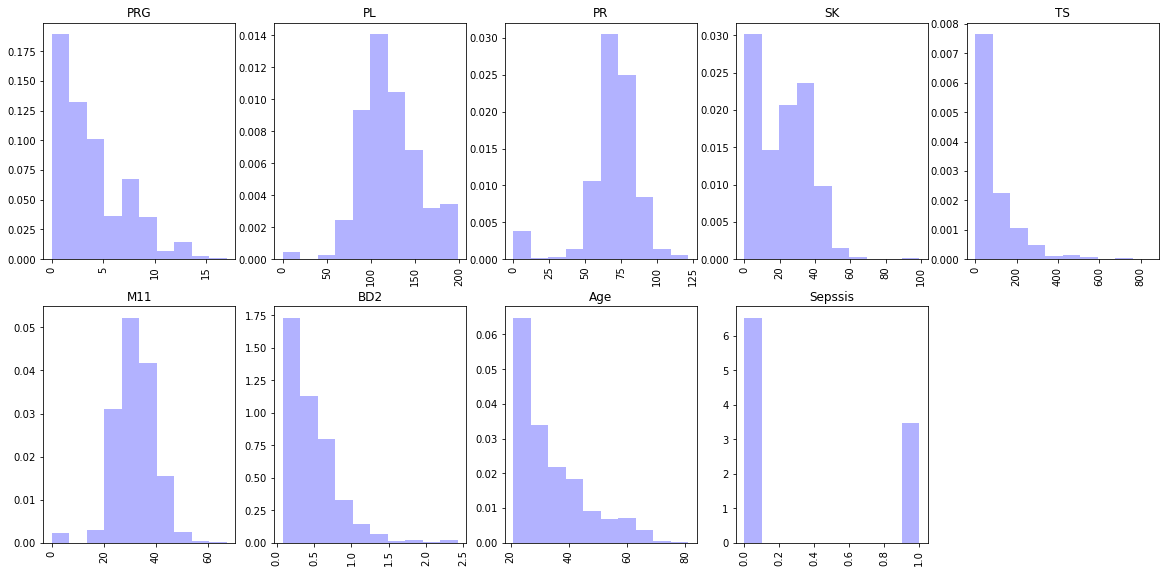

In [12]:
#Using the histogram plot to estimate the distribution of a variable
plt.figure(figsize=(20,20))
for i, col in enumerate(newPaitientsDf.columns):
    plt.subplot(4,5,i+1)
    plt.hist(newPaitientsDf[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

**=> Observation**:
- Attribute **Sepssis** is a categorical variable. Therefore, most data are from class 0, and data from class 1 is only half of class 0.
- Attributes **SK,PRG, TS, BD2, Age** are heavily skewed down to the right.
- Target variable **PL** is distributed around 120 with some extreme values around 198.
- Target variable **PR** is distributed around 68 with some extreme values around 122.
- Target variable **M11** is distributed around 31 with several values around 67.

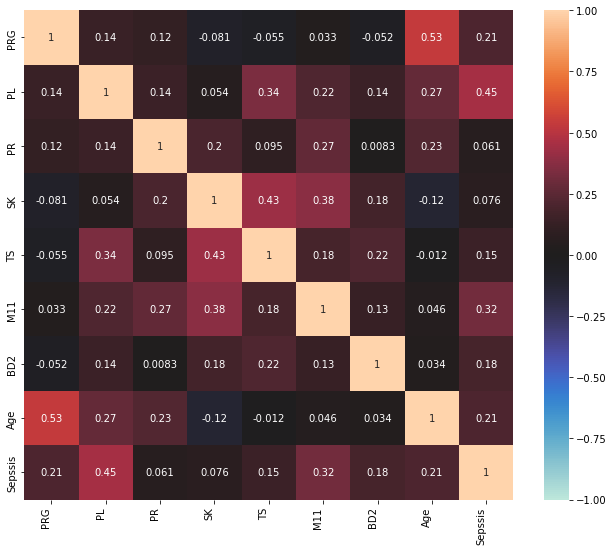

In [13]:
#To predict Sepssis (target variable) using all other attributes, plot the relationship between Sepssis and other columns.
#Check the correlation between variables in the data 
f, ax = plt.subplots(figsize=(11, 9))
corr = newPaitientsDf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

**=> Observation:** 
- There seems to be a good linear relationship between **Sepssis** and **PL**
- The relationship between **Sepssis** and other variables appears ,except **PL**, to be nonlinier (e.g. **BD2, M11, TS, SK, PR, PRG**).

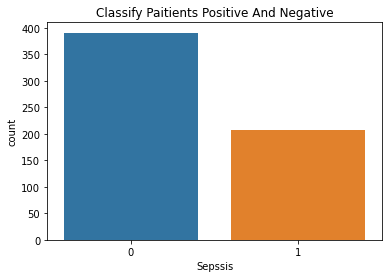

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot to see the classify of the number of negative and positive sepssis for patients.

sns.countplot(x='Sepssis',data=newPaitientsDf).set_title("Classify Paitients Positive And Negative")
plt.show()
plt.savefig('count_plot')

In [15]:
numberOfPositive = len(newPaitientsDf[newPaitientsDf['Sepssis']== 1])
numberOfNegative = len(newPaitientsDf[newPaitientsDf['Sepssis']== 0])
percentageOfPositive = numberOfPositive / (numberOfPositive + numberOfNegative)
print("Percentage of Positive is: " , percentageOfPositive * 100)
percentageOfNegative = numberOfNegative / (numberOfPositive + numberOfNegative)
print("Percentage of Negative is: " , percentageOfNegative * 100)

Percentage of Positive is:  34.72454090150251
Percentage of Negative is:  65.27545909849749


**=>** According to the graph and result after calculation above, Dataset is not balanced. The patient negative (class 0) to patient positive (class 1) ratio is approximately 2 times 65 : 35.
As a result, there is a strong probability that this dataset is better at classifying negative patients than positive patients. In the graph, this dataset is skewed to the right (class 0).

## 5. Data Pre-processing

In [16]:
paitients_x = newPaitientsDf[['PRG','PL','PR','SK','TS','M11','BD2','Age']]
paitients_y = newPaitientsDf['Sepssis']

In [17]:
print(paitients_x.shape)
print(paitients_y.shape)

(599, 8)
(599,)


In [18]:
from sklearn.model_selection import train_test_split

#Using the ratio 80:20 to split the dataframe
trainX, valX, trainY, valY = train_test_split(paitients_x, paitients_y, test_size=0.2,shuffle=True)
print("trainX: ", trainX.shape)
print("valX: ", valX.shape)
print("trainY: ", trainY.shape)
print("valY: ", valY.shape)

trainX:  (479, 8)
valX:  (120, 8)
trainY:  (479,)
valY:  (120,)


## 6. Data Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)


# scale trainX, testX and valX
trainX_scale = scaler.transform(trainX)
valX_scale = scaler.transform(valX)

## 7. Training Models

### 7.1 Function for Hyperparameter Tuning

**Hyperparameters Tuning** is a critical component of controlling the behavior of a machine learning model. If do not correctly tune hyperparameters, estimated model parameters produce suboptimal results because they do not minimize the loss function. This means that model has more flaws.

In [20]:
def hyperParameterTuning(trainX, trainY, model, parameters):
    # define search engine
    gsearch = GridSearchCV(estimator = model,
                           param_grid = parameters,                        
                           scoring = metrics.make_scorer(metrics.f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    
    # find parameters that produces best performance in f1-score
    gsearch.fit(trainX, trainY)
    print("Best parameters:",gsearch.best_params_)

Using GridSearchCV for finding the set of parameters that produces the best performance in f1-score. Cross validation method is used for finding the best set of parameters.


- **estimator**: model for tuning

- **param_grid**: set of parameters for tuning

- **scoring**: evaluation metric (f1-score)

- **cv**: cross validation (5-fold cross validation)

### 7.2 Logistic Regression model with GridSearchCV

**Logistic Regression** model is widely used in classification problems because it aims to minimize overfitting through regularization. The issue with Logistic Regression is the balance between bias and variance, which must be carefully considered. Hence, combined with **GridSearchCV** is a solution to the Logistic Regression problem that goes through each combination of every predefined element, validates the results, compares, and produces the best parameters for the models.

In [21]:
# perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

In [22]:
# Basic model
logReg = LogisticRegression(class_weight='balanced')
logReg.fit(trainX_scale, trainY.to_numpy().ravel())

LogisticRegression(class_weight='balanced')

In [23]:
# measure performance on validation set
preds = logReg.predict(valX_scale)
print(metrics.classification_report(valY, preds))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        83
           1       0.56      0.84      0.67        37

    accuracy                           0.75       120
   macro avg       0.74      0.77      0.74       120
weighted avg       0.80      0.75      0.76       120



In [28]:
# hyperparameters tuning for Logistic Regression
logRegParameters = {'C':         [0.1, 1, 10, 100, 1000],
                    'penalty':  ['l1', 'l2', 'elasticnet'], 
                    'max_iter': [1, 2, 100, 500, 1000],
                    'solver':   ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    'class_weight':['balanced']}

# perform hyperparameter tuning, only run once for result
hyperParameterTuning(trainX_scale, trainY.to_numpy().ravel(), LogisticRegression(), logRegParameters)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
Best parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1, 'penalty': 'l2', 'solver': 'sag'}


C:\Users\rjich\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.65803596        nan 0.64611407 0.65784525
 0.65784525 0.66010289 0.62352604 0.66678101        nan        nan
        nan        nan        nan        nan        nan 0.66786832
        nan 0.66505484 0.66949218 0.67103483 0.65796762 0.64010336
 0.65694723        nan        nan        nan        nan        nan
        nan        nan 0.66079893        nan 0.66191819 0.65769853
 0.65769853 0.65796762 0.65769853 0.65769853        nan        nan
        nan        nan        nan        nan        nan 0.66079893
        nan 0.66191819 0.65769853 0.65769853 0.65796762 0.65769853
 0.65769853        nan        nan        nan        nan        nan
        nan        nan 0.66079893        nan 0.66191819 0.65769853
 0.65769853 0.65796762 0.65769853 0.65769853        nan        nan
        nan        nan        nan        nan        n

#### Parameters:

**C**: Inverse of regularization strength.

**penalty**: Type of regularization.

**max_iter**: Maximum number of iterations taken for the solvers to converge.

**solver**: Algorithm to use in the optimization problem.

#### Output:
Best parameters: {'C': 10, 'max_iter': 1, 'penalty': 'l2', 'solver': 'sag'}

**=>** penalty = l2, it means that using **Ridge Regression** as known as **L2 Logistic Regression**

In [29]:
# train logistic regression model again with the new set of parameters
logReg = LogisticRegression(C=10, 
                            max_iter= 1, 
                            penalty= 'l2', 
                            solver= 'sag',
                            class_weight = 'balanced')
logReg.fit(trainX_scale, trainY.to_numpy().ravel())

# measure performance on validation set
preds = logReg.predict(valX_scale)
print(metrics.classification_report(valY, preds))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        83
           1       0.53      0.84      0.65        37

    accuracy                           0.72       120
   macro avg       0.71      0.75      0.70       120
weighted avg       0.79      0.72      0.73       120



C:\Users\rjich\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


**Conclusion**: There are not improvement in the performance after Hyperparameter Tuning

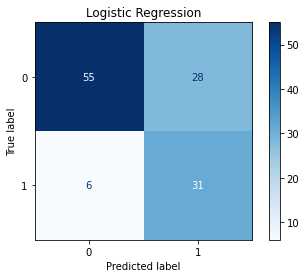

In [30]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(logReg, valX_scale, valY,
                                 cmap=plt.cm.Blues)
plt.title("Logistic Regression")
plt.show()

### 7.3 Decision Tree Classifier with GridSearchCV

**Decision Tree model** is simple to implement and does not necessitate much effort in terms of data preparation, normalization, and scaling. However, the tree is inconsistent when a small change in a tree can result in a significant change in a tree's structure, resulting in a high variance. The tree's algorithms are such that they will go deep into the tree to find the leaf of the tree, increasing the complexity of the tree and causing the overfitting problem. Since the decision tree model has a high variance, overfitting is likely to occur. Therefore, combined with **GridSearchCV** will attempt to find the optimal parameter to lessen the overfitting problem and thus reduce the model's variance.

In [31]:
from sklearn.tree import DecisionTreeClassifier

# train basic decision tree classifier model
decTree = DecisionTreeClassifier(criterion = 'entropy',class_weight='balanced')
decTree.fit(trainX_scale, trainY.to_numpy().ravel())

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [32]:
# measure performance on validation set
preds = decTree.predict(valX_scale)
print(metrics.classification_report(valY, preds))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        83
           1       0.53      0.68      0.60        37

    accuracy                           0.72       120
   macro avg       0.68      0.71      0.69       120
weighted avg       0.74      0.72      0.72       120



In [33]:
# Hyperparameters tuning for Decision Tree
decTreeParameters = {'criterion':        ['gini','entropy'],
                    'max_depth':         [5, 8, 15, 25, 30, 38],
                    'min_samples_split': [2, 15, 50, 100],
                    'min_samples_leaf':  [1, 10, 50, 100],
                    'class_weight':      ['balanced']}

# perform hyperparameter tuning, only run once for result
hyperParameterTuning(trainX_scale, trainY.to_numpy().ravel(), DecisionTreeClassifier(), decTreeParameters)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 100}


In [34]:
# train decision tree classifier model again with new set of parameters
decTree = DecisionTreeClassifier(criterion='entropy', 
                                max_depth=5,
                                min_samples_leaf=1,
                                min_samples_split=100,
                                class_weight='balanced')

decTree.fit(trainX_scale, trainY.to_numpy().ravel())

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_split=100)

In [35]:
# measure performance on validation set
preds = decTree.predict(valX_scale)
print(metrics.classification_report(valY, preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        83
           1       0.57      0.81      0.67        37

    accuracy                           0.75       120
   macro avg       0.73      0.77      0.73       120
weighted avg       0.79      0.75      0.76       120



**Conclusion**: There are a lot improvements,especially precision and f1-score, for the model after applying Hyperparameter Tuning.

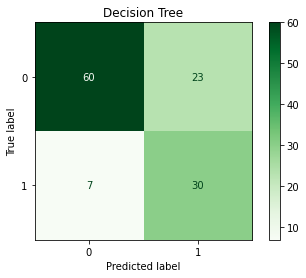

In [36]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(decTree, valX_scale, valY,
                                 cmap=plt.cm.Greens)
plt.title("Decision Tree")
plt.show()

### 7.4 Random Forest with GridsSearchCV

**Random Forest model** is a collection of decision trees that work together to solve the overfitting problem. When compared to a decision tree, it has lower variance and better predictability. The random forest, like the decision tree, is unaffected by missing or scailing data and normalizing data. On the other hand, because it is a collection of many decision trees, the random forest's complexity is unavoidable. However, the prediction time is extremely long. **GridSearchCV** plays a role in determining the best way to find the optimal number of trees for the model as well as the other parameters.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# train basic random forest classifier model
ranForest = RandomForestClassifier(class_weight='balanced')
ranForest.fit(trainX_scale, trainY.to_numpy().ravel())

RandomForestClassifier(class_weight='balanced')

In [38]:
# measure performance on validation set
preds = decTree.predict(valX_scale)
print(metrics.classification_report(valY, preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        83
           1       0.57      0.81      0.67        37

    accuracy                           0.75       120
   macro avg       0.73      0.77      0.73       120
weighted avg       0.79      0.75      0.76       120



In [39]:
# Hyperparameters tuning for Random Forest
ranForestParameters = {'criterion':        ['gini','entropy'],
                    'bootstrap':         ['True'],
                    'max_depth':         [3, 5, 10],
                    'max_features':      ['sqrt', 'log2'],
                    'n_estimators':      [ 10 , 50, 100 ],
                    'class_weight':      ['balanced']}

# perform hyperparameter tuning, only run once for result
hyperParameterTuning(trainX_scale, trainY.to_numpy().ravel(), RandomForestClassifier(), ranForestParameters)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'bootstrap': 'True', 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}


In [40]:
# train decision tree classifier model again with new set of parameters
ranForest = RandomForestClassifier(criterion='gini', 
                                bootstrap='True',
                                max_depth=5,
                                max_features='log2',
                                n_estimators=10,
                                class_weight='balanced')

ranForest.fit(trainX_scale, trainY.to_numpy().ravel())

RandomForestClassifier(bootstrap='True', class_weight='balanced', max_depth=5,
                       max_features='log2', n_estimators=10)

In [41]:
# measure performance on validation set
preds = ranForest.predict(valX_scale)
print(metrics.classification_report(valY, preds))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78        83
           1       0.54      0.86      0.67        37

    accuracy                           0.73       120
   macro avg       0.73      0.77      0.72       120
weighted avg       0.80      0.73      0.74       120



**Conclusion**: There are nothing much improved.

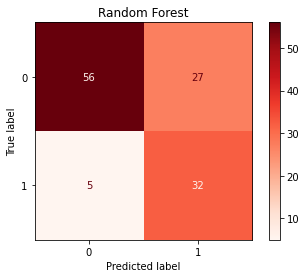

In [42]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(ranForest, valX_scale, valY,
                                 cmap=plt.cm.Reds)
plt.title("Random Forest")
plt.show()

## 8. Comparing Models for Prediction

In [43]:
# test hyperparameters tuned models with test set
logRegPreds = logReg.predict(valX_scale)
decTreePreds = decTree.predict(valX_scale)
ranForestPreds = ranForest.predict(valX_scale)

In [44]:
# print results
print("Logistic Regression")
print(metrics.classification_report(valY, logRegPreds), '\n')
print("Decision Tree Classification")
print(metrics.classification_report(valY, decTreePreds), '\n')
print("Random Forrest Classification")
print(metrics.classification_report(valY, ranForestPreds), '\n')

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.66      0.76        83
           1       0.53      0.84      0.65        37

    accuracy                           0.72       120
   macro avg       0.71      0.75      0.70       120
weighted avg       0.79      0.72      0.73       120
 

Decision Tree Classification
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        83
           1       0.57      0.81      0.67        37

    accuracy                           0.75       120
   macro avg       0.73      0.77      0.73       120
weighted avg       0.79      0.75      0.76       120
 

Random Forrest Classification
              precision    recall  f1-score   support

           0       0.92      0.67      0.78        83
           1       0.54      0.86      0.67        37

    accuracy                           0.73       120
   macro avg       0.73      0.77      0.72  

**Ultimate Judgment:**
- Based on the table Comparing Models above, it showed that **Decision Tree** has an efficient performance in making prediction.
- Because it has the number negative sepssis of patients being clasified accurately at class 0 has an precision 0.90 which is a high score which can be accepted to predict compared with **Logistic Regression** ( class0 precision: 90) and **Random Forest** (class0 precision: 92). **Decision Tree** also has a highest score in clasified accurately at class 1 has an precision 0.57 while the remaining models are 0.53 and 0.54 respectively.
- Besides that, model **Decision Tree** has the good performance score for both class 0 and 1 in recall which are 0.72 and 0.81 respectively. Meanwhile, both **Logistic Regression** and **Random Forest** had the recall score for class 0 under 0.70.
- Furthermore, the higher the value of the f1-score, the better the balance between the precision and the recall score. Model **Decision Tree** also had the highest score for both class 0 and class 1 so it had the better balance.

**=> Conclusion:** Choosing **Decision Tree** model to predict.

## 9. Applying Model with Test Dataset

### 9.1 Import test dataset

In [123]:
# read test data for prediction
testData = pd.read_csv("Paitients_Files_Test.csv",
                      delimiter=",")

# create submission dataFrame for storing predictions
submission = pd.DataFrame(columns=['ID','Sepssis'])
submission['ID'] = testData['ID']

# drop ID and Insurance column in test dataset
testData = testData.drop(['ID', 'Insurance'], axis='columns')

In [124]:
#Check testData
testData

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63
165,2,122,70,27,0,36.8,0.340,27
166,5,121,72,23,112,26.2,0.245,30
167,1,126,60,0,0,30.1,0.349,47


### 9.2 Scaling Data

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(testData)

# scale newDataFrameToTrain
testData = scaler.transform(testData)

### 9.3 Make Prediction with the selected Model

In [113]:
predictSepssis = decTree.predict(testData)

In [114]:
predictSepssis

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [126]:
#Add data into Sepssis column of submission dataframe to export file predict
submission['Sepssis'] = predictSepssis

In [127]:
#Check data inside dataframe
submission

,ID,Sepssis
0,ICU200609,0
1,ICU200610,0
2,ICU200611,0
3,ICU200612,1
4,ICU200613,1
...,...,...
164,ICU200773,0
165,ICU200774,0
166,ICU200775,0
167,ICU200776,1


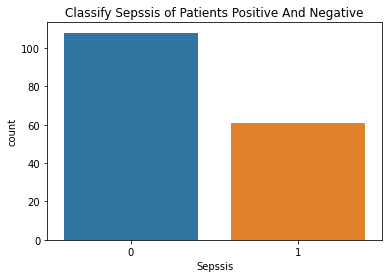

<Figure size 432x288 with 0 Axes>

In [128]:
sns.countplot(x='Sepssis',data=submission).set_title("Classify Sepssis of Patients Positive And Negative")
plt.show()
plt.savefig('count_plot')

In [118]:
Positive = len(submission[submission['Sepssis']== 1])
Negative = len(submission[submission['Sepssis']== 0])
percentagePositive = Positive / (Positive + Negative)
print("Percentage of Positive is: " , percentagePositive * 100)
percentageNegative = Negative / (Positive + Negative)
print("Percentage of Negative is: " , percentageNegative * 100)

Percentage of Positive is:  36.09467455621302
Percentage of Negative is:  63.905325443786985


### 9.4 Transform dtype of column Sepssis back to Object (Negative & Positive)

In [129]:
#Transform dtype of column Sepssis into Object again
submission['Sepssis'] = submission['Sepssis'].apply(lambda x : 'Negative' if x == 0 else 'Positive')
submission

,ID,Sepssis
0,ICU200609,Negative
1,ICU200610,Negative
2,ICU200611,Negative
3,ICU200612,Positive
4,ICU200613,Positive
...,...,...
164,ICU200773,Negative
165,ICU200774,Negative
166,ICU200775,Negative
167,ICU200776,Positive


## 10. Export to file .csv

In [120]:
submission.to_csv('s3758994_predictions.csv',index=False)